In [104]:
# BCA Screen
# Attempt to replicate BCA's Screening Universe without MSCI Data

In [105]:
from quantopian.pipeline import Pipeline
from quantopian.pipeline import CustomFactor, CustomFilter
from quantopian.research import run_pipeline
from quantopian.pipeline.data import morningstar
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.pipeline.factors.morningstar import MarketCap
import numpy as np
import pandas as pd

#### Define Parameters

In [106]:
start_date = '2017-06-22'
end_date = '2017-06-22'

#### Security Filters

In [115]:
common_stock = morningstar.share_class_reference.security_type.latest.eq('ST00000001')
primary_share = morningstar.share_class_reference.is_primary_share.latest  

# build a tradeable filter
tradeable_filter = common_stock & primary_share

In [108]:
# custom factors
mkt_cap = MarketCap(mask=tradeable_filter) / 1e9

# Filter for the top X securities by market cap.  
top_mkt_cap = mkt_cap >= .99

pipe = Pipeline(
    columns={'security_type': morningstar.share_class_reference.security_type.latest,
             'standard_name': morningstar.company_reference.standard_name.latest,
             'market_cap': morningstar.valuation.market_cap.latest / 1e9,
             'exchange_id': morningstar.share_class_reference.exchange_id.latest,
             'symbol':morningstar.share_class_reference.symbol.latest,
             'depository_receipt': morningstar.share_class_reference.is_depositary_receipt.latest,
             'primary_share': morningstar.share_class_reference.is_primary_share.latest,
             'limited_partnership': morningstar.balance_sheet.limited_partnership.latest,
            },
    screen = top_mkt_cap
)

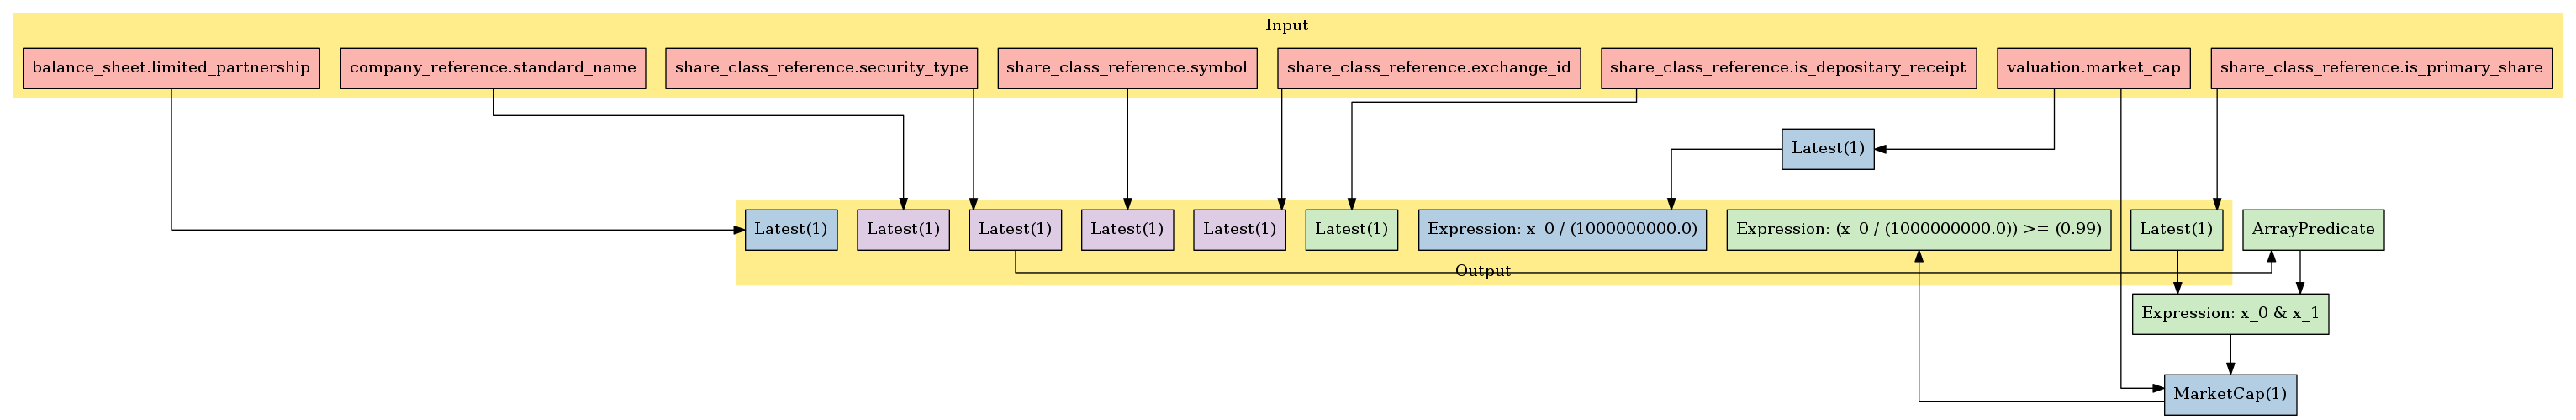

In [109]:
pipe.show_graph(format='png')

In [110]:
pipe_output = run_pipeline(pipe, start_date=start_date, end_date=end_date)

In [111]:
pipe_output.shape

(2014, 8)

In [112]:
pipe_output.sort_values('market_cap', ascending=False).head(5)

depository_receipt  \
2017-06-22 00:00:00+00:00 Equity(24 [AAPL])                   False   
                          Equity(26578 [GOOG_L])              False   
                          Equity(5061 [MSFT])                 False   
                          Equity(16841 [AMZN])                False   
                          Equity(42950 [FB])                  False   

                                                 exchange_id  \
2017-06-22 00:00:00+00:00 Equity(24 [AAPL])              NAS   
                          Equity(26578 [GOOG_L])         NAS   
                          Equity(5061 [MSFT])            NAS   
                          Equity(16841 [AMZN])           NAS   
                          Equity(42950 [FB])             NAS   

                                                  limited_partnership  \
2017-06-22 00:00:00+00:00 Equity(24 [AAPL])                       NaN   
                          Equity(26578 [GOOG_L])                  NaN   
                          Equity(5061 [MSFT])                     NaN   
                          Equity(16841 [AMZN])                    NaN   
                          Equity(42950 [FB])                      NaN   

                                                  market_cap primary_share  \
2017-06-22 00:00:00+00:00 Equity(24 [AAPL])          760.543          True   
                          Equity(26578 [GOOG_L])     670.297          True   
                          Equity(5061 [MSFT])        542.521          True   
                          Equity(16841 [AMZN])       479.041          True   
                          Equity(42950 [FB])         446.058          True   

                                                 security_type  \
2017-06-22 00:00:00+00:00 Equity(24 [AAPL])         ST00000001   
                          Equity(26578 [GOOG_L])    ST00000001   
                          Equity(5061 [MSFT])       ST00000001   
                          Equity(16841 [AMZN])      ST00000001   
                          Equity(42950 [FB])        ST00000001   

                                                   standard_name symbol  
2017-06-22 00:00:00+00:00 Equity(24 [AAPL])            Apple Inc   AAPL  
                          Equity(26578 [GOOG_L])    Alphabet Inc  GOOGL  
                          Equity(5061 [MSFT])     Microsoft Corp   MSFT  
                          Equity(16841 [AMZN])    Amazon.com Inc   AMZN  
                          Equity(42950 [FB])        Facebook Inc     FB

In [113]:
pipe_output.sort_values('market_cap', ascending=False).tail(5)

depository_receipt exchange_id  \
2017-06-22 00:00:00+00:00 Equity(18786 [SBSI])              False         NAS   
                          Equity(13810 [CCF])               False         ASE   
                          Equity(3037 [FSS])                False         NYS   
                          Equity(25320 [ECPG])              False         NAS   
                          Equity(50347 [PKY])               False         NYS   

                                                limited_partnership  \
2017-06-22 00:00:00+00:00 Equity(18786 [SBSI])                  NaN   
                          Equity(13810 [CCF])                   NaN   
                          Equity(3037 [FSS])                    NaN   
                          Equity(25320 [ECPG])                  NaN   
                          Equity(50347 [PKY])                   NaN   

                                                market_cap primary_share  \
2017-06-22 00:00:00+00:00 Equity(18786 [SBSI])    0.994789          True   
                          Equity(13810 [CCF])     0.993063          True   
                          Equity(3037 [FSS])      0.991265          True   
                          Equity(25320 [ECPG])    0.990891          True   
                          Equity(50347 [PKY])     0.990561          True   

                                               security_type  \
2017-06-22 00:00:00+00:00 Equity(18786 [SBSI])    ST00000001   
                          Equity(13810 [CCF])     ST00000001   
                          Equity(3037 [FSS])      ST00000001   
                          Equity(25320 [ECPG])    ST00000001   
                          Equity(50347 [PKY])     ST00000001   

                                                           standard_name  \
2017-06-22 00:00:00+00:00 Equity(18786 [SBSI])  Southside Bancshares Inc   
                          Equity(13810 [CCF])                 Chase Corp   
                          Equity(3037 [FSS])         Federal Signal Corp   
                          Equity(25320 [ECPG])  Encore Capital Group Inc   
                          Equity(50347 [PKY])                Parkway Inc   

                                               symbol  
2017-06-22 00:00:00+00:00 Equity(18786 [SBSI])   SBSI  
                          Equity(13810 [CCF])     CCF  
                          Equity(3037 [FSS])      FSS  
                          Equity(25320 [ECPG])   ECPG  
                          Equity(50347 [PKY])     PKY

In [114]:
pipe_output[~ (pipe_output['security_type'] == 'ST00000001')].sort_values('symbol')

,,depository_receipt,exchange_id,limited_partnership,market_cap,primary_share,security_type,standard_name,symbol
